In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyemu
import flopy
import platform
from pathlib import Path
import shutil
import pandas as pd

In [16]:
org_ws = Path('../MV_Model_Files/')
new_ws = 'simple_ies'
if "macos" in platform.platform().lower() or "darwin" in platform.platform().lower():
    exe_dir = Path('../bin/mac/')
elif "linux" in platform.platform().lower():
    exe_dir = Path('../bin/linux/')
else:
    exe_dir = Path('../bin/win/')

In [17]:
if os.path.exists(new_ws):
    shutil.rmtree(new_ws)
shutil.copytree(org_ws, new_ws)

'simple_ies'

In [18]:
sim = flopy.mf6.MFSimulation.load(sim_ws = new_ws)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package oc...
    loading package chd...
    loading package rch...
    loading package riv...
    loading package wel...
    loading package obs...
  loading solution package at...


In [19]:
shutil.copy2(os.path.join(exe_dir,'mf6'),os.path.join(new_ws,'mf6'))

'simple_ies/mf6'

In [20]:
pyemu.os_utils.run('mf6',cwd=new_ws)

                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                   VERSION 6.3.0 release candidate 07/30/2021
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Dec 29 2021 09:30:50 with Intel(R) Fortran Intel(R) 64
   Compiler for applications running on Intel(R) 64, Version 19.1.3.301 Build
                                20200925_000000

This software is preliminary or provisional and is subject to 
revision. It is being provided to meet the need for timely best 
science. The software has not received final approval by the U.S. 
Geological Survey (USGS). No warranty, expressed or implied, is made 
by the USGS or the U.S. Government as to the functionality of the 
software and related material nor shall the fact of release 
constitute any such warranty. The software is provided on the 
condition that neither the USGS nor the U.S. Government shall be held 
liable for any damages resulting from the autho

In [21]:
for f in ["k_aq.ref","k_clay.ref"]:
    arr = np.loadtxt(os.path.join(new_ws,f))
    arr[:,:] = arr.mean()
    np.savetxt(os.path.join(new_ws,f),arr,fmt="%15.6E")

In [22]:
pyemu.os_utils.run('mf6',cwd=new_ws)

                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                   VERSION 6.3.0 release candidate 07/30/2021
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Dec 29 2021 09:30:50 with Intel(R) Fortran Intel(R) 64
   Compiler for applications running on Intel(R) 64, Version 19.1.3.301 Build
                                20200925_000000

This software is preliminary or provisional and is subject to 
revision. It is being provided to meet the need for timely best 
science. The software has not received final approval by the U.S. 
Geological Survey (USGS). No warranty, expressed or implied, is made 
by the USGS or the U.S. Government as to the functionality of the 
software and related material nor shall the fact of release 
constitute any such warranty. The software is provided on the 
condition that neither the USGS nor the U.S. Government shall be held 
liable for any damages resulting from the autho

In [23]:
#need a spatial reference to use pilot points. this means xoff, yoff, rotation, epsg
m=sim.get_model()
m.modelgrid

xll:0.0; yll:0.0; rotation:0.0; units:feet; lenuni:1

In [24]:
pf = pyemu.utils.PstFrom(original_d=new_ws,
                         new_d='template',
                         remove_existing=True,
                         start_datetime="1-1-2025",
                         spatial_reference=m.modelgrid)

2025-07-10 11:11:35.961088 starting: opening PstFrom.log for logging
2025-07-10 11:11:35.961167 starting PstFrom process
2025-07-10 11:11:35.961433 starting: setting up dirs
2025-07-10 11:11:35.961474 starting: removing existing new_d 'template'
2025-07-10 11:11:35.964711 finished: removing existing new_d 'template' took: 0:00:00.003237
2025-07-10 11:11:35.964728 starting: copying original_d 'simple_ies' to new_d 'template'
2025-07-10 11:11:35.971701 finished: copying original_d 'simple_ies' to new_d 'template' took: 0:00:00.006973
2025-07-10 11:11:35.971816 finished: setting up dirs took: 0:00:00.010383


In [25]:
?pf.add_parameters

Signature:
pf.add_parameters(
    filenames,
    par_type,
    zone_array=None,
    dist_type='gaussian',
    sigma_range=4.0,
    upper_bound=None,
    lower_bound=None,
    transform=None,
    par_name_base='p',
    index_cols=None,
    use_cols=None,
    use_rows=None,
    pargp=None,
    pp_space=10,
    use_pp_zones=False,
    num_eig_kl=100,
    spatial_reference=None,
    geostruct=None,
    datetime=None,
    mfile_fmt='free',
    mfile_skip=None,
    mfile_sep=None,
    ult_ubound=None,
    ult_lbound=None,
    rebuild_pst=False,
    alt_inst_str='inst',
    comment_char=None,
    par_style='multiplier',
    initial_value=None,
)
Docstring:
Add list or array style model input files to PstFrom object.
This method is the main entry point for adding parameters to the
pest interface

Args:
    filenames (`str`): Model input filenames to parameterize. By default filename should give relative
        loction from top level of pest template directory
        (`new_d` as passed to `Ps

In [26]:
k_pars = [f for f in os.listdir(new_ws) if 'k_' in f and f.endswith('.ref')]
k_pars
for f in k_pars:
    pf.add_parameters(f,par_type='constant',upper_bound=20,lower_bound=0.05)

2025-07-10 11:11:35.977376 transform was not passed, setting default tranform to 'log'
2025-07-10 11:11:35.977482 starting: adding constant type m style parameters for file(s) ['k_aq.ref']
2025-07-10 11:11:35.977559 starting: loading array template/k_aq.ref
2025-07-10 11:11:35.977890 finished: loading array template/k_aq.ref took: 0:00:00.000331
2025-07-10 11:11:35.977953 loaded array 'simple_ies/k_aq.ref' of shape (40, 25)
2025-07-10 11:11:35.978500 starting: writing array-style template file 'template/p_inst0_constant.csv.tpl'
2025-07-10 11:11:35.978516 starting: writing template file template/p_inst0_constant.csv.tpl for ['p_inst:0']
2025-07-10 11:11:35.980504 finished: writing template file template/p_inst0_constant.csv.tpl for ['p_inst:0'] took: 0:00:00.001988
2025-07-10 11:11:35.980519 starting: writing array-based template file 'template/p_inst0_constant.csv.tpl'
2025-07-10 11:11:35.981979 finished: adding constant type m style parameters for file(s) ['k_aq.ref'] took: 0:00:00.0

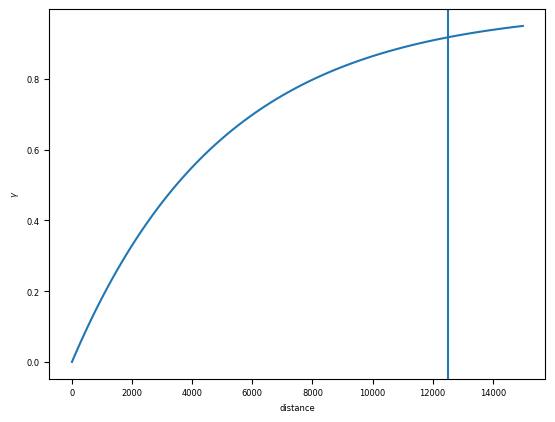

In [27]:
#for pilot points, we first need to build a variogram, which describes the underlying spatial correlation structure of the variable
pp_v = pyemu.geostats.ExpVario(contribution=1.0, a=5000) #rule of thumb is that range should be atleast 2x pp spacing (delr= 500
pp_gs = pyemu.geostats.GeoStruct(variograms=pp_v,transform='log')
ax=pp_gs.plot()
ax.axvline(x=500*5*5)

In [28]:
for f in k_pars:
    base = f.split('.')[0]
    pf.add_parameters(f,par_type='pilotpoint',upper_bound=20,lower_bound=0.05,pp_space=3,geostruct=pp_gs)

2025-07-10 11:11:36.026842 transform was not passed, setting default tranform to 'log'
2025-07-10 11:11:36.026978 starting: adding pilotpoint type m style parameters for file(s) ['k_aq.ref']
2025-07-10 11:11:36.027012 starting: using geostruct:name:struct1,nugget:0.0,structures:
name:var1,contribution:1.0,a:5000.0,anisotropy:1.0,bearing:0.0

2025-07-10 11:11:36.027046 starting: loading array template/k_aq.ref
2025-07-10 11:11:36.027381 finished: loading array template/k_aq.ref took: 0:00:00.000335
2025-07-10 11:11:36.027462 loaded array 'simple_ies/k_aq.ref' of shape (40, 25)
2025-07-10 11:11:36.027969 starting: writing array-style template file 'template/p_inst2_pilotpoint.csv.tpl'
2025-07-10 11:11:36.027988 starting: setting up pilot point parameters
2025-07-10 11:11:36.027998 No spatial reference (containing cell spacing) passed.
2025-07-10 11:11:36.028004 OK - using spatial reference in parent object.
2025-07-10 11:11:36.068483 104 pilot point parameters created
2025-07-10 11:11:36

In [29]:
?pf.add_observations

Signature:
pf.add_observations(
    filename,
    insfile=None,
    index_cols=None,
    use_cols=None,
    use_rows=None,
    prefix='',
    ofile_skip=None,
    ofile_sep=None,
    rebuild_pst=False,
    obsgp=None,
    zone_array=None,
    includes_header=True,
)
Docstring:
Add values in output files as observations to PstFrom object

Args:
    filename (`str`): model output file name(s) to set up
        as observations. By default filename should give relative
        loction from top level of pest template directory
        (`new_d` as passed to `PstFrom()`).
    insfile (`str`): desired instructions file filename
    index_cols (`list`-like or `int`): columns to denote are indices for obs
    use_cols (`list`-like or `int`): columns to set up as obs. If None,
        and `index_cols` is not None (i.e list-style obs assumed),
        observations will be set up for all columns in `filename` that
        are not in `index_cols`.
    use_rows (`list`-like or `int`): select only spe

In [30]:
obs_csvs = [f for f in os.listdir(new_ws) if f.endswith('.csv')]
for f in obs_csvs:
    df = pd.read_csv(os.path.join(new_ws,f))
    pf.add_observations(f,index_cols='time',use_cols=df.columns.tolist()[1:])

2025-07-10 11:11:37.506238 starting: adding observations from output file riv.csv
2025-07-10 11:11:37.506326 starting: adding observations from tabular output file '['riv.csv']'
2025-07-10 11:11:37.506355 starting: reading list-style file: template/riv.csv
2025-07-10 11:11:37.506719 finished: reading list-style file: template/riv.csv took: 0:00:00.000364
2025-07-10 11:11:37.506928 starting: building insfile for tabular output file riv.csv
2025-07-10 11:11:37.507978 finished: building insfile for tabular output file riv.csv took: 0:00:00.001050
2025-07-10 11:11:37.508002 starting: adding observation from instruction file 'template/riv.csv.ins'
2025-07-10 11:11:37.509046 finished: adding observation from instruction file 'template/riv.csv.ins' took: 0:00:00.001044
2025-07-10 11:11:37.509244 finished: adding observations from tabular output file '['riv.csv']' took: 0:00:00.002918
2025-07-10 11:11:37.509265 finished: adding observations from output file riv.csv took: 0:00:00.003027
2025-07

In [31]:
for f in k_pars:
    pf.add_observations(f)

2025-07-10 11:11:37.524736 starting: adding observations from output file k_aq.ref
2025-07-10 11:11:37.524920 starting: adding observations from array output file 'k_aq.ref'
2025-07-10 11:11:37.525713 starting: adding observation from instruction file 'template/k_aq.ref.ins'
2025-07-10 11:11:37.529638 finished: adding observation from instruction file 'template/k_aq.ref.ins' took: 0:00:00.003925
2025-07-10 11:11:37.529693 finished: adding observations from array output file 'k_aq.ref' took: 0:00:00.004773
2025-07-10 11:11:37.529720 finished: adding observations from output file k_aq.ref took: 0:00:00.004984
2025-07-10 11:11:37.529731 starting: adding observations from output file k_clay.ref
2025-07-10 11:11:37.529744 starting: adding observations from array output file 'k_clay.ref'
2025-07-10 11:11:37.530287 starting: adding observation from instruction file 'template/k_clay.ref.ins'
2025-07-10 11:11:37.534213 finished: adding observation from instruction file 'template/k_clay.ref.ins'

In [32]:
pf.mod_sys_cmds.append('mf6')

In [33]:
?pf.draw

Signature: pf.draw(num_reals=100, sigma_range=6, use_specsim=False, scale_offset=True)
Docstring:
Draw a parameter ensemble from the distribution implied by the initial parameter values in the
control file and the prior parameter covariance matrix.

Args:
    num_reals (`int`): the number of realizations to draw
    sigma_range (`int`): number of standard deviations represented by parameter bounds.  Default is 6 (99%
        confidence).  4 would be approximately 95% confidence bounds
    use_specsim (`bool`): flag to use spectral simulation for grid-scale pars (highly recommended).
        Default is False
    scale_offset (`bool`): flag to apply scale and offset to parameter bounds before calculating prior variance.
        Dfault is True.  If you are using non-default scale and/or offset and you get an exception during
        draw, try changing this value to False.

Returns:
    `pyemu.ParameterEnsemble`: a prior parameter ensemble

Note:
    This method draws by parameter group

 

In [34]:
pst = pf.build_pst(filename=os.path.join(pf.new_d,'at.pst'),version=2)

noptmax:0, npar_adj:210, nnz_obs:2048
2025-07-10 11:11:37.554982 forward_run line:pyemu.os_utils.run(r'mf6')



In [35]:
#draw prior ensemble that accounts for PP spatial correlation (this is for later for when we want to use iES)
pe = pf.draw(num_reals=100)
pe.enforce()
pe.to_csv(os.path.join(pf.new_d,'prior.csv'))



2025-07-10 11:11:37.560529 starting: drawing realizations
2025-07-10 11:11:37.560804 starting: Drawing 210 non-specsim pars
building diagonal cov
processing  name:struct1,nugget:0.0,structures:
name:var1,contribution:1.0,a:5000.0,anisotropy:1.0,bearing:0.0

working on pargroups ['p_inst:2']
build cov matrix
done
getting diag var cov 104
scaling full cov by diag var cov
working on pargroups ['p_inst:3']
build cov matrix
done
getting diag var cov 104
scaling full cov by diag var cov
adding remaining parameters to diagonal
2025-07-10 11:11:37.577163 finished: Drawing 210 non-specsim pars took: 0:00:00.016359
2025-07-10 11:11:37.577195 finished: drawing realizations took: 0:00:00.016666


In [36]:
pst = pyemu.Pst(filename=os.path.join(pf.new_d,'at.pst'))
pst.pestpp_options["ies_par_en"] = "prior.csv"
obs = pst.observation_data
obs

,obsnme,obsval,weight,obgnme,i,j,oname,otype,time,usecol
obsnme,,,,,,,,,,
oname:riv.csv_otype:lst_usecol:ds_time:1.0,oname:riv.csv_otype:lst_usecol:ds_time:1.0,-1.002092e+06,1.0,oname:riv.csv_otype:lst_usecol:ds,NaN,NaN,riv.csv,lst,1.0,ds
oname:riv.csv_otype:lst_usecol:pf_time:1.0,oname:riv.csv_otype:lst_usecol:pf_time:1.0,-2.804323e+05,1.0,oname:riv.csv_otype:lst_usecol:pf,NaN,NaN,riv.csv,lst,1.0,pf
oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_in_time:1.0,oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_in_time:1.0,4.919740e+05,1.0,oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_in,NaN,NaN,at.budget.csv,lst,1.0,chd(chd-1)
oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_out_time:1.0,oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_out_time:1.0,6.053681e+04,1.0,oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_out,NaN,NaN,at.budget.csv,lst,1.0,chd(chd-1)
oname:at.budget.csv_otype:lst_usecol:percent_difference_time:1.0,oname:at.budget.csv_otype:lst_usecol:percent_difference_time:1.0,-2.252621e-04,1.0,oname:at.budget.csv_otype:lst_usecol:percent_difference,NaN,NaN,at.budget.csv,lst,1.0,percent
...,...,...,...,...,...,...,...,...,...,...
oname:k_clay_otype:arr_i:9_j:5,oname:k_clay_otype:arr_i:9_j:5,1.809259e+02,1.0,oname:k_clay.ref_otype:arr,9,5,k,arr,NaN,NaN
oname:k_clay_otype:arr_i:9_j:6,oname:k_clay_otype:arr_i:9_j:6,1.809259e+02,1.0,oname:k_clay.ref_otype:arr,9,6,k,arr,NaN,NaN
oname:k_clay_otype:arr_i:9_j:7,oname:k_clay_otype:arr_i:9_j:7,1.809259e+02,1.0,oname:k_clay.ref_otype:arr,9,7,k,arr,NaN,NaN


In [37]:
pyemu.os_utils.run('pestpp-ies at.pst',cwd='template')



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.20
binary compiled on Jul  3 2025 at 13:41:19

started at 07/10/25 11:11:37
...processing command line: ' pestpp-ies at.pst'
...using serial run manager

using control file: "at.pst"
in directory: "/Users/kmarkovich/Desktop/PESTPP_Madison25/notebooks/template"
on host: "ABQ-GQXTTQ9TWR.local"

processing control file at.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  at.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_sigma_range 4
...running control file parameter values



    ---  starting serial ru

In [38]:
pst.set_res(os.path.join(pf.new_d,"at.base.rei"))

In [39]:
pst.phi

2.6616070244088824e-11

In [40]:
assert pst.phi < 1e-6

In [41]:
#zero everything out for starters
obs.weight = 0

In [42]:
#we need to tell PEST what are the observed values and their weights, to calc the objective function
truth = pd.read_csv(os.path.join(new_ws,'obsvalues.dat'),delim_whitespace=True)
truth

/var/folders/z3/q69sm_6d715fmszm_kq6g7b00000gq/T/ipykernel_97796/2762166273.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


,obsnme,obsval,weight,obgnme
0,w01,11.85000,1.000000,headgroup
1,w02,11.35000,1.000000,headgroup
2,w03,11.83000,1.000000,headgroup
3,w04,11.43000,1.000000,headgroup
4,w05,10.50000,1.000000,headgroup
5,w06,10.79000,1.000000,headgroup
6,w07,9.13000,1.000000,headgroup
7,w08,8.79000,1.000000,headgroup
8,w09,8.83000,1.000000,headgroup
9,w10,10.64000,1.000000,headgroup


In [43]:
obs["standard_deviation"] = np.nan
for i,stuff in truth.iterrows():
    obs.loc[obs.obsnme.str.contains(stuff.obsnme),'obsval'] = stuff.obsval
    obs.loc[obs.obsnme.str.contains(stuff.obsnme),'weight'] = stuff.weight
    obs.loc[obs.obsnme.str.contains(stuff.obsnme),'obgnme'] = stuff.obgnme
    if "headdiff" in stuff.obgnme:
        obs.loc[obs.obsnme.str.contains(stuff.obsnme),'standard_deviation'] = 0.0001
    elif "headgroup" in stuff.obgnme:
        obs.loc[obs.obsnme.str.contains(stuff.obsnme),'standard_deviation'] = 0.5
    else:
        obs.loc[obs.obsnme.str.contains(stuff.obsnme),'standard_deviation'] = np.abs(stuff.obsval) * 0.2 #20%

/var/folders/z3/q69sm_6d715fmszm_kq6g7b00000gq/T/ipykernel_97796/304307766.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.01' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


In [44]:
obs.loc[obs.weight>0,:].describe()

,obsval,weight,standard_deviation
count,37.000000,37.000000,37.000000
mean,-25871.727271,0.838660,5537.102230
std,147738.693071,0.371795,29480.082596
min,-894494.000000,0.000013,0.000100
25%,4.180000,1.000000,0.500000
50%,8.820000,1.000000,0.500000
75%,10.800000,1.000000,0.500000
max,33390.410960,1.000000,178898.800000


In [45]:
pst.observation_data = obs
pst.write(os.path.join(pf.new_d,'at.pst'),version=2)

noptmax:0, npar_adj:210, nnz_obs:37


In [46]:
pyemu.os_utils.run('pestpp-ies at.pst',cwd='template')



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.20
binary compiled on Jul  3 2025 at 13:41:19

started at 07/10/25 11:11:39
...processing command line: ' pestpp-ies at.pst'
...using serial run manager

using control file: "at.pst"
in directory: "/Users/kmarkovich/Desktop/PESTPP_Madison25/notebooks/template"
on host: "ABQ-GQXTTQ9TWR.local"

processing control file at.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  at.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_sigma_range 4
...running control file parameter values



    ---  starting serial ru

In [47]:
phi= pst.phi
phi

14596.246402205506

In [48]:
pst.parameter_data.loc[:,"parval1"] = pe.loc[pe.index[0],pst.par_names].values

In [49]:
pst.parameter_data.head()

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,i,inst,j,pname,pstyle,ptype,zone
parnme,,,,,,,,,,,,,,,,,
pname:p_inst:0_ptype:cn_pstyle:m,pname:p_inst:0_ptype:cn_pstyle:m,log,factor,0.254059,0.05,20.0,p_inst:0,1.0,0.0,1,NaN,0,NaN,p,m,cn,NaN
pname:p_inst:1_ptype:cn_pstyle:m,pname:p_inst:1_ptype:cn_pstyle:m,log,factor,2.772770,0.05,20.0,p_inst:1,1.0,0.0,1,NaN,1,NaN,p,m,cn,NaN
pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:1_zone:1,pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:1_zone:1,log,factor,0.588591,0.05,20.0,p_inst:2,1.0,0.0,1,1,2,1,p,m,pp,1
pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:4_zone:1,pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:4_zone:1,log,factor,0.724949,0.05,20.0,p_inst:2,1.0,0.0,1,1,2,4,p,m,pp,1
pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:7_zone:1,pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:7_zone:1,log,factor,0.621493,0.05,20.0,p_inst:2,1.0,0.0,1,1,2,7,p,m,pp,1


In [50]:
pst.write(os.path.join(pf.new_d,"test.pst"),version=2)
pyemu.os_utils.run("pestpp-ies test.pst",cwd=pf.new_d)

noptmax:0, npar_adj:210, nnz_obs:37


             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.20
binary compiled on Jul  3 2025 at 13:41:19

started at 07/10/25 11:11:40
...processing command line: ' pestpp-ies test.pst'
...using serial run manager

using control file: "test.pst"
in directory: "/Users/kmarkovich/Desktop/PESTPP_Madison25/notebooks/template"
on host: "ABQ-GQXTTQ9TWR.local"

processing control file test.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  test.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_sigma_range 4
...running control file par

In [51]:
pst.set_res(os.path.join(pf.new_d,"test.base.rei"))
pst.phi

2282.7902270497875

In [52]:
kobs = obs.loc[obs.obsnme.str.contains("k_aq"),:].copy()
kobs['i'] = kobs.i.astype(int)
kobs['j'] = kobs.j.astype(int)

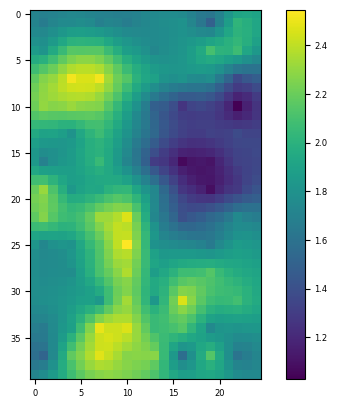

In [53]:
arr = np.zeros((kobs.i.max()+1,kobs.j.max()+1))
arr[kobs.i,kobs.j] = np.log10(pst.res.loc[kobs.obsnme,"modelled"].values)
cb = plt.imshow(arr)
plt.colorbar(cb)

In [54]:
pst = pyemu.Pst(os.path.join(pf.new_d,"at.pst"))
pst.control_data.noptmax = -2
pst.write(os.path.join(pf.new_d,"at.pst"),version=2)
pyemu.os_utils.run("pestpp-ies at.pst",cwd=pf.new_d)

noptmax:-2, npar_adj:210, nnz_obs:37


             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.20
binary compiled on Jul  3 2025 at 13:41:19

started at 07/10/25 11:11:40
...processing command line: ' pestpp-ies at.pst'
...using serial run manager

using control file: "at.pst"
in directory: "/Users/kmarkovich/Desktop/PESTPP_Madison25/notebooks/template"
on host: "ABQ-GQXTTQ9TWR.local"

processing control file at.pst
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  
...using glm algorithm
...using REDSVD for truncated svd solve
...maxsing: 10000000
...eigthresh:  1e-06
...initializing localizer
...not using localization
...using lambda multipliers: 0.1 , 1 , 10 , 
...using lambda scaling factors: 0.75 , 1 , 1.1 , 
...acceptable phi factor:  1.05
...lambda increase factor:  10
...lambda decrease factor:  0.75
...max run fail:  1
...initializing prior parameter cova

In [55]:
pst.set_res(os.path.join(pf.new_d,"at.base.rei"))
pst.phi

14596.246402205506

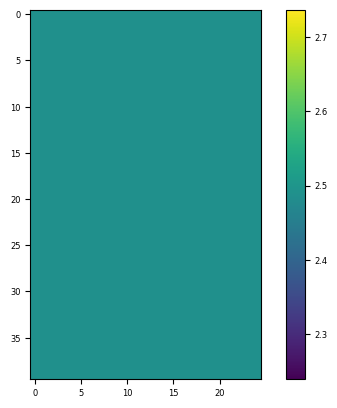

In [56]:
arr = np.zeros((kobs.i.max()+1,kobs.j.max()+1))
arr[kobs.i,kobs.j] = np.log10(pst.res.loc[kobs.obsnme,"modelled"].values)
cb = plt.imshow(arr)
plt.colorbar(cb)